# Support Vector Machines

<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# SVM - Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
# check the correlation
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

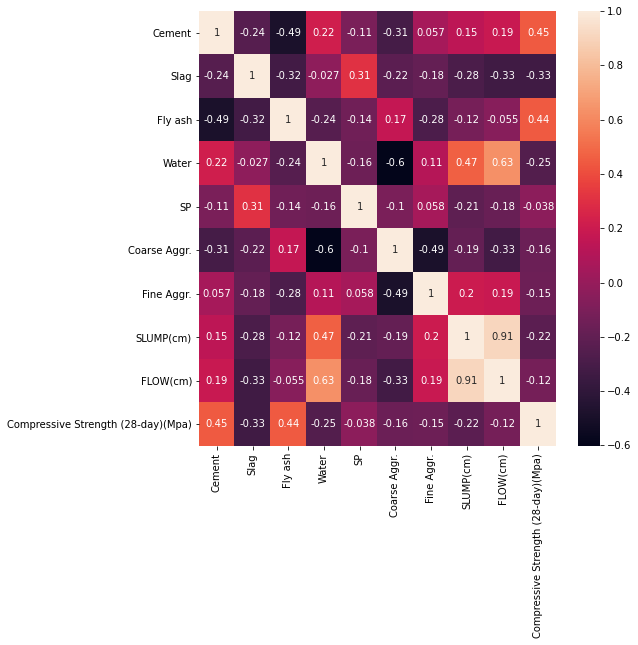

In [17]:
# visualize the correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True);

# Train | Test Split

In [18]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [20]:
X = df.drop(['Compressive Strength (28-day)(Mpa)'], axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
# scaling is a MUST do for SVM Regression and Classfication, because SVM looks at feature spaces.
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [28]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Support Vector Machines - Regression


There are three different implementations of Support Vector Regression: 
- SVR, 
- NuSVR
- LinearSVR. 

**LinearSVR provides a faster implementation than SVR but only considers the` linear kernel`, while NuSVR implements a slightly different formulation than SVR and LinearSVR.**

See [Implementation details](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details) for further details.

In [29]:
from sklearn.svm import SVR, LinearSVR

Setting C: C is 1 by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it: decreasing C corresponds to more regularization.

LinearSVC and LinearSVR are less sensitive to C when it becomes large, and prediction results stop improving after a certain threshold. Meanwhile, larger C values will take more time to train, sometimes up to 10 times longer

Epsilon: https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression

- epsilon : number of errors you are willing to allow

Take note if you set epislon value too low, it can lead to overfit. (because model trying to fit every points in traning set and leave no error. but this overfitting may lead to issues in Test set

In [32]:
# help(SVR)

In [33]:
base_model = SVR()

In [35]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [37]:
base_pred = base_model.predict(scaled_X_test)

# Evaluation

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
MAE = mean_absolute_error(y_test, base_pred)

In [40]:
MSE = mean_squared_error(y_test, base_pred)
RMSE = np.sqrt(MSE)

In [42]:
MAE, RMSE

(5.236902091259178, 6.695914838327133)

In [43]:
y_test.mean()

36.26870967741935

# Grid Search in Attempt for Better Model
 can I improve the base model?

In [44]:
from sklearn.model_selection import GridSearchCV

In [47]:
parameters = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma':['scale', 'auto'],
    'degree': [2, 3, 4],
    'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]
}

In [48]:
svr = SVR()

In [49]:
grid_model = GridSearchCV(svr, parameters)

In [50]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [52]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [55]:
grid_pred = grid_model.predict(scaled_X_test)

In [56]:
MAE = mean_absolute_error(y_test, grid_pred)

In [59]:
RMSE = np.sqrt(mean_squared_error(y_test, grid_pred))

In [60]:
MAE, RMSE

(2.5128012210762365, 3.178210305119858)

Base Model one: (5.236902091259178, 6.695914838327133)

We can see that there is a significant improvement in both MAE and RMSE compared to base model.